## Customer Service

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Pep Analytics Test.csv')

In [3]:
data.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day)
0,BBCHH,1,2018-05-20,2018-05-21,D,14
1,CHWFD,1,2018-09-23,2018-09-23,C,8
2,DYDMF,2,2018-11-10,2018-11-13,C,11
3,EZYSA,3,2018-04-12,2018-04-16,B,8
4,HWAKX,3,2018-08-05,2018-08-06,B,11


In [4]:
data.shape

(30940, 6)

### 1.    Plot new users acquired every month on a bar chart (New user in a month = a customer who has placed a request for the first time in this month)


In [5]:
data.columns

Index(['Transaction_ID', 'Profile ID', 'Date_of_Booking',
       'Date_of_Service_Requested', 'Source',
       'Slot of Booking (Hour of the Day)'],
      dtype='object')

In [6]:
li=[]
for i in data['Profile ID'].value_counts():
        if i==1:
            li.append(i)

In [7]:
data.dtypes

Transaction_ID                       object
Profile ID                            int64
Date_of_Booking                      object
Date_of_Service_Requested            object
Source                               object
Slot of Booking (Hour of the Day)     int64
dtype: object

In [8]:
li=[]
for i in data['Date_of_Booking']:
    re=i.split('-')
    li.append(re)

In [9]:
fetch_date=pd.DataFrame(li,columns=['Year','Month','Day'])

In [10]:
df=pd.concat([data,fetch_date],axis=1)

In [11]:
df.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),Year,Month,Day
0,BBCHH,1,2018-05-20,2018-05-21,D,14,2018,05,20
1,CHWFD,1,2018-09-23,2018-09-23,C,8,2018,09,23
2,DYDMF,2,2018-11-10,2018-11-13,C,11,2018,11,10
3,EZYSA,3,2018-04-12,2018-04-16,B,8,2018,04,12
4,HWAKX,3,2018-08-05,2018-08-06,B,11,2018,08,05


In [12]:
df['MYdata']=df['Month']+"/"+df['Year']

In [13]:
bar_data=df.groupby(['MYdata'])['Profile ID'].count()

In [14]:
y=np.array(bar_data)

In [15]:
x=sorted(pd.unique(df['MYdata']))

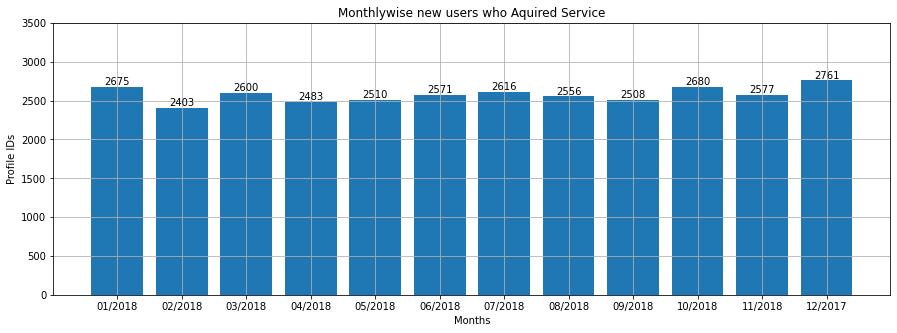

In [16]:
fig, ax = plt.subplots(figsize = (15, 5))
plt.bar(x,y)
ax.set_xlabel('Months')
plt.ylabel('Profile IDs')
plt.grid()
plt.title('Monthlywise new users who Aquired Service')
for i in range(len(x)):
    plt.text(i,y[i],y[i],ha='center',va='bottom')
plt.ylim([0,3500])
plt.show()

### 2.30-Day repeat rate is defined as percentage of new users who have placed a 2nd order within 30 days of placing their first order. What is the 30-day repeat rate of users acquired in December 2017?


In [17]:
df.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),Year,Month,Day,MYdata
0,BBCHH,1,2018-05-20,2018-05-21,D,14,2018,05,20,05/2018
1,CHWFD,1,2018-09-23,2018-09-23,C,8,2018,09,23,09/2018
2,DYDMF,2,2018-11-10,2018-11-13,C,11,2018,11,10,11/2018
3,EZYSA,3,2018-04-12,2018-04-16,B,8,2018,04,12,04/2018
4,HWAKX,3,2018-08-05,2018-08-06,B,11,2018,08,05,08/2018


In [18]:
df.shape

(30940, 10)

In [19]:
new=df.groupby('MYdata')['Profile ID'].count()
new

MYdata
01/2018    2675
02/2018    2403
03/2018    2600
04/2018    2483
05/2018    2510
06/2018    2571
07/2018    2616
08/2018    2556
09/2018    2508
10/2018    2680
11/2018    2577
12/2017    2761
Name: Profile ID, dtype: int64

#### Calculate by percentage

In [20]:
rate=(new[-1]/df['MYdata'].count())*100
rate

8.923723335488042

### Result: 30 days for Dec 2017 rate is 8.92% 

### 3.    What is the 90-day repeat rate of users acquired in Jan,Feb,March 2018?


In [21]:
new=df.groupby('MYdata')['Profile ID'].count()
new

MYdata
01/2018    2675
02/2018    2403
03/2018    2600
04/2018    2483
05/2018    2510
06/2018    2571
07/2018    2616
08/2018    2556
09/2018    2508
10/2018    2680
11/2018    2577
12/2017    2761
Name: Profile ID, dtype: int64

In [22]:
new[:3]

MYdata
01/2018    2675
02/2018    2403
03/2018    2600
Name: Profile ID, dtype: int64

In [23]:
sum(new[:3])

7678

In [24]:
rate1=(sum(new[:3])/df['MYdata'].count())*100
rate1

24.815772462831287

###                        Result: 90 days rate for jan,feb,march is 24.81%

### 4.    Use any classification model to predict the 90-day repeat of users acquired in November 2018. Hint: Use Source, Slot of Booking, Gap between date of Booking and date of service requested as predictor variables


In [25]:
df.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),Year,Month,Day,MYdata
0,BBCHH,1,2018-05-20,2018-05-21,D,14,2018,05,20,05/2018
1,CHWFD,1,2018-09-23,2018-09-23,C,8,2018,09,23,09/2018
2,DYDMF,2,2018-11-10,2018-11-13,C,11,2018,11,10,11/2018
3,EZYSA,3,2018-04-12,2018-04-16,B,8,2018,04,12,04/2018
4,HWAKX,3,2018-08-05,2018-08-06,B,11,2018,08,05,08/2018


In [26]:
df.isnull().sum()

Transaction_ID                       0
Profile ID                           0
Date_of_Booking                      0
Date_of_Service_Requested            0
Source                               0
Slot of Booking (Hour of the Day)    0
Year                                 0
Month                                0
Day                                  0
MYdata                               0
dtype: int64

In [27]:
df.dtypes

Transaction_ID                       object
Profile ID                            int64
Date_of_Booking                      object
Date_of_Service_Requested            object
Source                               object
Slot of Booking (Hour of the Day)     int64
Year                                 object
Month                                object
Day                                  object
MYdata                               object
dtype: object

In [28]:
df['Date_of_Booking']=pd.to_datetime(df['Date_of_Booking'])
df['Date_of_Service_Requested']=pd.to_datetime(df['Date_of_Service_Requested'])

In [29]:
df['duration']=df['Date_of_Service_Requested']-df['Date_of_Booking']

In [30]:
x=df[['Source','Date_of_Booking','duration']]
x

,Source,Date_of_Booking,duration
0,D,2018-05-20,1 days
1,C,2018-09-23,0 days
2,C,2018-11-10,3 days
3,B,2018-04-12,4 days
4,B,2018-08-05,1 days
...,...,...,...
30935,C,2018-09-29,3 days
30936,A,2018-03-12,4 days
30937,C,2018-01-05,5 days
30938,C,2018-02-26,5 days


In [31]:
x=pd.get_dummies(x,drop_first=True)
x

,Date_of_Booking,duration,Source_B,Source_C,Source_D
0,2018-05-20,1 days,0,0,1
1,2018-09-23,0 days,0,1,0
2,2018-11-10,3 days,0,1,0
3,2018-04-12,4 days,1,0,0
4,2018-08-05,1 days,1,0,0
...,...,...,...,...,...
30935,2018-09-29,3 days,0,1,0
30936,2018-03-12,4 days,0,0,0
30937,2018-01-05,5 days,0,1,0
30938,2018-02-26,5 days,0,1,0


In [32]:
x.dtypes

Date_of_Booking     datetime64[ns]
duration           timedelta64[ns]
Source_B                     uint8
Source_C                     uint8
Source_D                     uint8
dtype: object

In [33]:
x[['Date_of_Booking','duration']]=x[['Date_of_Booking','duration']].astype('str')

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()

In [36]:
encode_booking=le.fit_transform(x['Date_of_Booking'])
encode_booking

array([170, 296, 344, ...,  35,  87, 150])

In [37]:
encode_duration=le.fit_transform(x['duration'])
encode_duration

array([1, 0, 3, ..., 5, 5, 3])

In [38]:
x=x.iloc[:,2:]

In [39]:
x['dateofbook']=encode_booking
x['duration']=encode_duration
x

,Source_B,Source_C,Source_D,dateofbook,duration
0,0,0,1,170,1
1,0,1,0,296,0
2,0,1,0,344,3
3,1,0,0,132,4
4,1,0,0,247,1
...,...,...,...,...,...
30935,0,1,0,302,3
30936,0,0,0,101,4
30937,0,1,0,35,5
30938,0,1,0,87,5


In [40]:
y=df['Profile ID']

In [41]:
print(x.shape)
print(y.shape)

(30940, 5)
(30940,)


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc=StandardScaler()

In [44]:
x_data=sc.fit_transform(x)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(x_data,y,test_size=0.2,random_state=10)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
li=LinearRegression()

In [49]:
li.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred=li.predict(X_test)

In [51]:
from sklearn.metrics import r2_score,mean_squared_error

In [52]:
r2_score(y_test,y_pred)

-0.00028049258784301756

In [53]:
np.sqrt(mean_squared_error(y_test,y_pred))

4834.162060197218

## Using "Data of Booking" as independent variable and repeated "profile ids"  are target varible

In [54]:
new=df.groupby('MYdata')['Profile ID'].count()
new

MYdata
01/2018    2675
02/2018    2403
03/2018    2600
04/2018    2483
05/2018    2510
06/2018    2571
07/2018    2616
08/2018    2556
09/2018    2508
10/2018    2680
11/2018    2577
12/2017    2761
Name: Profile ID, dtype: int64

In [55]:
y=new.values
y

array([2675, 2403, 2600, 2483, 2510, 2571, 2616, 2556, 2508, 2680, 2577,
       2761], dtype=int64)

In [56]:
x_sort=sorted(pd.unique(df['MYdata']))
x_sort

['01/2018',
 '02/2018',
 '03/2018',
 '04/2018',
 '05/2018',
 '06/2018',
 '07/2018',
 '08/2018',
 '09/2018',
 '10/2018',
 '11/2018',
 '12/2017']

In [57]:
x_sort=pd.get_dummies(x_sort,drop_first=True)
x_sort

,02/2018,03/2018,04/2018,05/2018,06/2018,07/2018,08/2018,09/2018,10/2018,11/2018,12/2017
0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0


In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rclf=RandomForestRegressor()

In [60]:
print(x_sort.shape)
print(y.shape)

(12, 11)
(12,)


In [61]:
rclf.fit(x_sort,y)

RandomForestRegressor()

In [62]:
y_pr=rclf.predict(x_sort)

In [63]:
# Actual values of X
x

,Source_B,Source_C,Source_D,dateofbook,duration
0,0,0,1,170,1
1,0,1,0,296,0
2,0,1,0,344,3
3,1,0,0,132,4
4,1,0,0,247,1
...,...,...,...,...,...
30935,0,1,0,302,3
30936,0,0,0,101,4
30937,0,1,0,35,5
30938,0,1,0,87,5


In [64]:
#Encoded values of dates
x_sort

,02/2018,03/2018,04/2018,05/2018,06/2018,07/2018,08/2018,09/2018,10/2018,11/2018,12/2017
0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0


In [65]:
x_sort.shape

(12, 11)

In [66]:
# Here we are predicting repeated users in November 2018
rclf.predict([[0,0,0,0,0,0,0,0,0,1,0]])

array([2600.28])

### Result: No.of repeated values are 2600

In [67]:
r2_score(y,y_pr)

0.8181998532448138

R2_score is 81% 

### 5.    Plot the distribution of users by frequency of their 90-day repeat (Number of times user repeated within first 90 days)


In [68]:
new=df.groupby('Date_of_Booking')['Profile ID'].count()
new[:90]

Date_of_Booking
2017-12-01    188
2017-12-02     88
2017-12-03     87
2017-12-04     71
2017-12-05     89
             ... 
2018-02-24     99
2018-02-25     86
2018-02-26     95
2018-02-27     87
2018-02-28     81
Name: Profile ID, Length: 90, dtype: int64

In [69]:
new[:90].values

array([188,  88,  87,  71,  89,  82,  88, 104,  83,  94,  88,  88,  84,
        73,  79,  86,  86,  81, 101,  73,  88,  97,  80,  83,  89,  88,
        84,  79,  67,  88, 105,  76,  80,  72,  77,  85,  81,  75,  85,
        76,  92, 102,  83,  95,  93,  77,  91,  70, 102,  81,  76,  99,
        82, 117, 105,  76,  70,  97,  74,  92,  98,  96,  72,  77,  64,
        86,  80,  80,  94,  81, 102,  78, 100,  83,  72,  70,  80,  94,
       100, 105,  87,  92,  84,  95,  79,  99,  86,  95,  87,  81],
      dtype=int64)

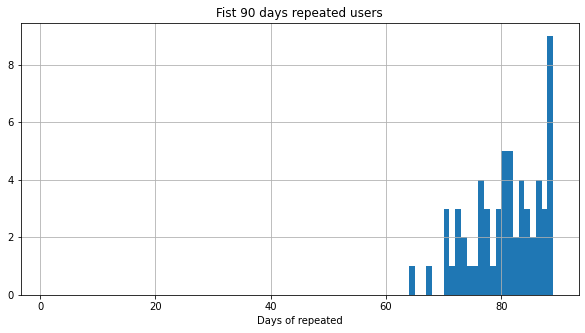

In [70]:
fig, ax = plt.subplots(figsize =(10, 5))
ax.hist(new[:90].values, bins = range(1,90))
plt.title('Fist 90 days repeated users')
plt.grid()
plt.xlabel('Days of repeated')
plt.show()

## Thank you...